In [62]:
# データフレーム用クラスをインポート
import pandas as pd

# 描画用ライブラリをインポート
import matplotlib.pyplot as plt
import seaborn as sns

# numpy のデータが扱えるよう、numpy をインポート
import numpy as np

# サンプル分割用の関数をインポート
from sklearn.model_selection import train_test_split

# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

# 勾配ブースティング決定木を行うためのモジュールをインポート
from sklearn.ensemble import GradientBoostingClassifier

# ランダムフォレストを行うためのモジュールをインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# 決定木構築用クラスをインポート
from sklearn.tree import DecisionTreeClassifier

# 線形回帰を行うためのモジュールをインポート
#from sklearn.linear_model import LinearRegression

# ロジスティック回帰を行うためのモジュールをインポート
#from sklearn.svm import SVC

# 決定木可視化用モジュール群をインポート
from sklearn.tree import export_graphviz
from graphviz import Source

# 正解率を作成するためのモジュールをインポート
from sklearn.metrics import accuracy_score

# 混合行列を作成するためのモジュールをインポート
from sklearn.metrics import confusion_matrix

# 【追加！】アンダーサンプリングを行うためのモジュールをインポート
from imblearn.under_sampling import RandomUnderSampler

# 【追加！】カテゴリ変数をOneHotベクトル化するためのモジュールをインポート
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 【追加！】ROCを作成するためのモジュールをインポート
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# 算出用
from statistics import mean, median,variance,stdev

In [63]:
# CSVデータを読み込む
# 学習用データ（train.tsv)、評価用データ（test.tsv）
trainData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/182_yachin/train3.csv", delimiter=',')

In [64]:
# 概要を把握
trainData.describe()

,id,賃料,区2,間取り2,築年数（月）,方角2,面積1,所在階2,所在階3,建物構造2
count,31470.000000,3.147000e+04,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000,31470.000000
mean,15735.500000,1.182903e+05,12.919479,2.481697,194.336543,3.251668,3480.864770,1.630696,6.842803,0.960439
std,9084.750822,7.374880e+04,6.901425,3.160845,181.463280,2.173354,1881.424453,15.825037,6.808768,1.357318
min,1.000000,2.500000e+04,1.000000,0.000000,0.000000,-1.000000,486.000000,-99.000000,-99.000000,0.000000
25%,7868.250000,7.600000e+04,7.000000,0.000000,41.000000,2.000000,2244.000000,2.000000,3.000000,0.000000
50%,15735.500000,1.020000e+05,12.000000,1.000000,161.000000,4.000000,2841.000000,3.000000,5.000000,0.000000
75%,23602.750000,1.360000e+05,19.000000,4.000000,329.000000,5.000000,4239.000000,5.000000,10.000000,2.000000
max,31470.000000,2.500000e+06,24.000000,29.000000,12235.000000,7.000000,43010.000000,53.000000,58.000000,9.000000


In [65]:
# 欠損値の有無を把握
trainData.isnull().sum()

id        0
賃料        0
区2        0
間取り2      0
築年数（月）    0
方角2       0
面積1       0
所在階2      0
所在階3      0
建物構造2     0
dtype: int64

In [66]:
trainData.head()

,id,賃料,区2,間取り2,築年数（月）,方角2,面積1,所在階2,所在階3,建物構造2
0,1,75000,1,0,117,3,2001.0,1,12,0
1,2,76000,2,1,538,-1,1650.0,5,10,2
2,3,110000,3,0,102,4,2205.0,12,15,0
3,4,150000,4,5,352,4,6048.0,3,4,0
4,5,74000,18,3,379,4,3966.0,1,2,1


In [67]:
print(trainData.columns) # カラム名の確認

Index(['id', '賃料', '区2', '間取り2', '築年数（月）', '方角2', '面積1', '所在階2', '所在階3',
       '建物構造2'],
      dtype='object')


C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0, flags=flags)


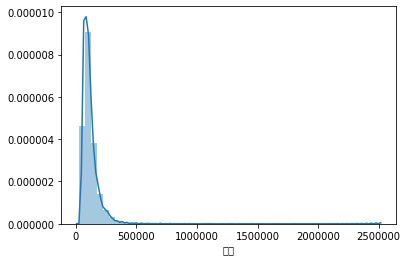

In [68]:
# 目的変数の分布状況を把握
sns.distplot(trainData['賃料'])

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0, flags=flags)


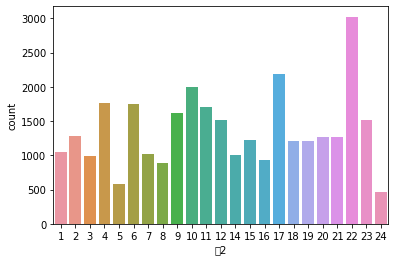

In [69]:
# 説明変数の分布状況を把握
sns.countplot(x='区2', data=trainData)

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21462 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12426 missing from curre

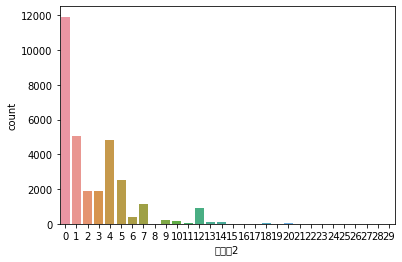

In [70]:
# 説明変数の分布状況を把握
sns.countplot(x='間取り2', data=trainData)

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65289 missing from c

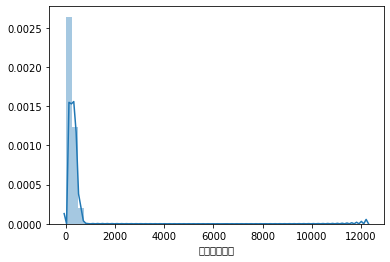

In [71]:
# 目的変数の分布状況を把握
sns.distplot(trainData['築年数（月）'])

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35282 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35282 missing from current font.
  font.set_text(s, 0, flags=flags)


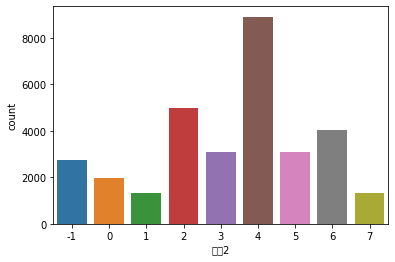

In [72]:
# 説明変数の分布状況を把握
sns.countplot(x='方角2', data=trainData)

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31309 missing from current font.
  font.set_text(s, 0, flags=flags)


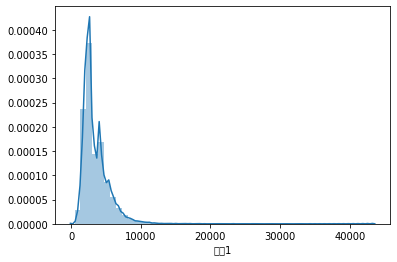

In [73]:
# 目的変数の分布状況を把握
sns.distplot(trainData['面積1'])

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22312 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38542 missing from curre

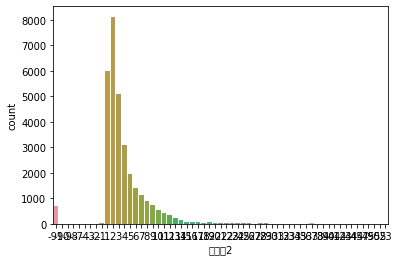

In [74]:
# 説明変数の分布状況を把握
sns.countplot(x='所在階2', data=trainData)

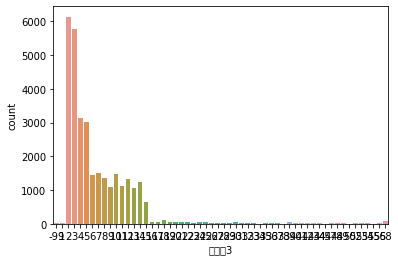

In [75]:
# 説明変数の分布状況を把握
sns.countplot(x='所在階3', data=trainData)

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27083 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29289 missing from cur

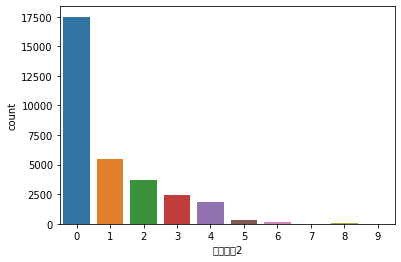

In [76]:
# 説明変数の分布状況を把握
sns.countplot(x='建物構造2', data=trainData)

In [77]:
# データを訓練用データ・検証用データに分ける（訓練用：検証用＝7:3）
#feature_names=["pclass_1","pclass_2","pclass_3","sex_val","sibsp","parch_0","parch_1","parch_2","parch_3","parch_4","parch_5","fare","embarked_S","embarked_C","embarked_Q"]
#data=trainData[feature_names]
TARGET_NAME = "賃料"
data=trainData.drop(TARGET_NAME, axis=1)
target=trainData[TARGET_NAME]
(X_train, X_test ,y_train, y_test) = train_test_split(data, target, test_size = 0.3)
print(X_train.shape, X_test.shape ,y_train.shape, y_test.shape)

(22029, 9) (9441, 9) (22029,) (9441,)


In [78]:
# アンダーサンプリングを行う

# 正例の数を保存
#positive_count_train = y_train.sum()

# 正例が11.1％になるまで負例をダウンサンプリング
#rus = RandomUnderSampler(ratio={0:positive_count_train*8, 1:positive_count_train})
# 正例が10％になるまで負例をダウンサンプリング
#rus = RandomUnderSampler(ratio={0:positive_count_train*9, 1:positive_count_train})

# 学習用データに反映
#X_train_resampled, y_train_resampled = rus.fit_sample(X_train, y_train)

X_train_resampled = X_train
y_train_resampled = y_train

In [81]:
# 決定木モデルを構築
clf = RandomForestRegressor(n_jobs=-1, random_state = 2525)
#clf.fit(X_train, y_train)
clf.fit(X_train_resampled, y_train_resampled)

C:\Users\tamot\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=2525, verbose=0,
                      warm_start=False)

In [86]:
# 精度検証を行う（訓練用データを確認）
predict_labels_be = clf.predict(X_test)
clf.score(X_test, y_test)

0.8819159570856313

C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 36035 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\tamot\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26009 missing from current font.
  font.set_text(s, 0, flags=flags)


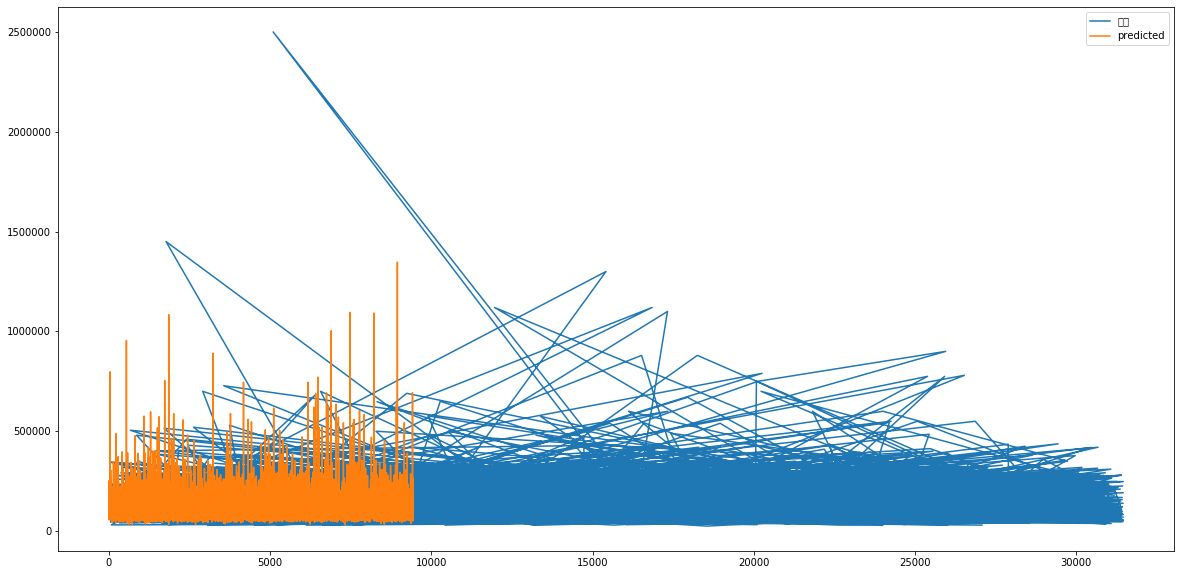

In [90]:
# 視覚化
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(y_test, label="賃料")
plt.plot(predict_labels_be, label="predicted")
plt.legend()

In [105]:
# テストデータの読み込み
testData = pd.read_csv("C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/182_yachin/test3.csv", delimiter=',')

In [106]:
# 概要を把握
testData.describe()

,id,区2,間取り2,築年数（月）,方角2,面積1,所在階2,所在階3,建物構造2
count,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000,31262.000000
mean,47101.500000,12.911106,2.508189,195.390026,3.270104,3486.126044,1.452882,6.790384,0.962798
std,9024.706394,6.877282,3.230290,165.242012,2.185748,1890.409474,16.427179,7.133425,1.360581
min,31471.000000,1.000000,0.000000,0.000000,-1.000000,100.000000,-99.000000,-99.000000,0.000000
25%,39286.250000,7.000000,0.000000,43.000000,2.000000,2228.000000,2.000000,3.000000,0.000000
50%,47101.500000,12.000000,1.000000,161.000000,4.000000,2849.000000,3.000000,5.000000,0.000000
75%,54916.750000,19.000000,4.000000,330.000000,5.000000,4260.000000,5.000000,10.000000,2.000000
max,62732.000000,24.000000,38.000000,1336.000000,7.000000,40761.000000,53.000000,60.000000,10.000000


In [107]:
# 欠損値の有無を把握
testData.isnull().sum()

id        0
区2        0
間取り2      0
築年数（月）    0
方角2       0
面積1       0
所在階2      0
所在階3      0
建物構造2     0
dtype: int64

In [115]:
# モデルからを目的変数データを算出
testTarget = clf.predict(testData)
print(testTarget.dtype)
result = testData[["id"]]
result["賃料"] = testTarget.astype(np.int64)
result.head()

float64


C:\Users\tamot\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,賃料
0,31471,144600
1,31472,117500
2,31473,85225
3,31474,57500
4,31475,115600


In [116]:
# 結果をTSV出力
# export csv
result.to_csv(path_or_buf='C:/Users/tamot/OneDrive/デスクトップ/SIGNATE/182_yachin/result_20200306.csv', sep=',', header=False, index=False, encoding='utf8')